# Import Libraries

In [ ]:
# mathematics functions
import numpy as np
# data structures and analysis
import pandas as pd
# ploting
import matplotlib.pyplot as plt
# fancy ploting
import seaborn as sns

In [ ]:
#pre prossessing and optimization
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [ ]:

# Logistic regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# SVM
from sklearn.svm import SVC

In [ ]:
# performance metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, make_scorer, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, mean_squared_error
from yellowbrick.classifier import ClassificationReport

In [ ]:

# Logistic regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# SVM
from sklearn.svm import SVC

# Read Data

In [ ]:
credit_df = pd.read_csv('./data/credit.csv')
credit_df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
credit_df.drop(['ID'],axis = 1,inplace = True)
#removing ["MARRIAGE"] == 0 and  ["EDUCATION"] == 0
credit_df = credit_df.loc[(credit_df['EDUCATION'] != 0) & (credit_df['MARRIAGE'] != 0)]
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
(credit_df).columns
#Checking for missing values
credit_df.isnull().sum()
#describe data
credit_df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,...,29932.000000,29932.00000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000
mean,167523.375651,1.603568,1.852399,1.554590,35.479721,-0.016203,-0.133235,-0.165776,-0.220099,-0.265569,...,43320.699452,40367.54861,38927.267072,5659.603034,5.923502e+03,5226.158760,4830.180075,4805.269310,5221.906421,0.221535
std,129821.209970,0.489164,0.788941,0.518277,9.219044,1.123450,1.196990,1.196386,1.168849,1.133057,...,64385.857098,60845.48775,59601.231051,16555.874642,2.306020e+04,17620.773728,15680.849676,15294.066811,17795.285035,0.415287
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.00000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2339.750000,1772.75000,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.000000,122.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19068.500000,18125.50000,17111.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54613.250000,50253.50000,49260.250000,5006.000000,5.000000e+03,4507.250000,4015.000000,4040.250000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.00000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# Data Preprocessing

In [ ]:
# OneHot encoding
credit_df = pd.get_dummies(credit_df,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6'], drop_first=True)
credit_df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5'

In [ ]:
# split dataset into train and test sets
X = credit_df.drop(["DEFAULT"],axis=1)
y = credit_df["DEFAULT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

prediction = dict()


In [ ]:
# SMOTE (if we want to use to balance the minority class)
# used only on train set
# increase minority class sample size to the same as majority class
smote = SMOTE(sampling_strategy='minority', random_state = 2)
X_train_sm , y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,count
DEFAULT,
0,17483
1,17483


In [ ]:
# need to scale data for svm model (because svm kernel is sensitive to scaling)
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (22449, 80)
Number transactions y_train dataset:  (22449,)
Number transactions X_test dataset:  (7483, 80)
Number transactions y_test dataset:  (7483,)


# Conclusion

putting together the optimized models obtained by hyperparameter tuning. And finaaly, plotting ROC curve

In [ ]:
# optimized regression model
lg = LogisticRegression(max_iter=10000, random_state=25, C=5)
lg.fit(X_train_sm, y_train_sm.values.ravel())

In [ ]:
# optimized decision tree model
tr = DecisionTreeClassifier(max_depth= 12, min_samples_split= 2, random_state=25)
tr.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=12, random_state=25)

In [ ]:
# optimized random forest model
rf = RandomForestClassifier(n_estimators= 80, max_depth= 14, random_state=42)
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=14, n_estimators=80, random_state=42)

In [ ]:
# optimized SVM model
svm = SVC( C = 1000, gamma = 0.1, kernel = "rbf", random_state = 42, probability= True)
svm.fit(X_train_sm_scaled,y_train_sm.values.ravel())

SVC(C=1000, gamma=0.1, probability=True, random_state=42)

In [ ]:
# optimized KNN model
knn = KNeighborsClassifier(algorithm = "kd_tree", n_neighbors = 3, weights = "distance")
knn.fit(X_train_sm, y_train_sm.values.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, weights='distance')

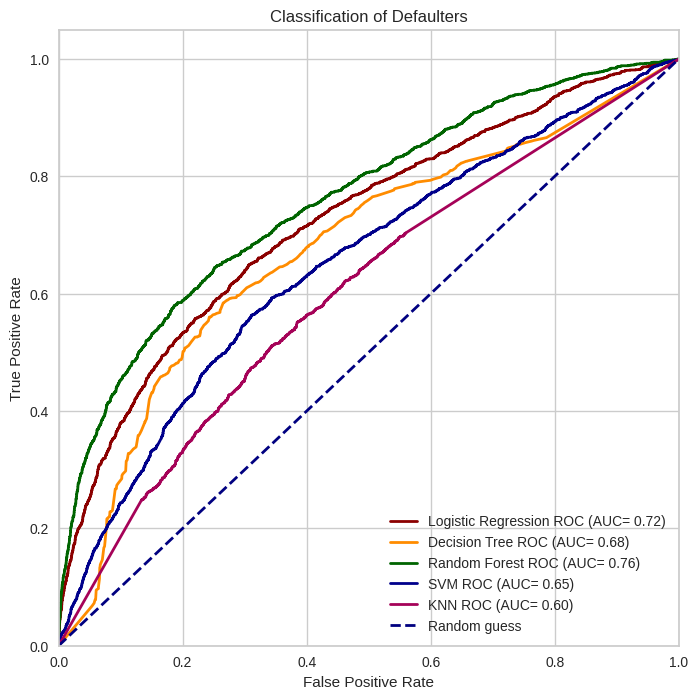

In [ ]:
# Predict propabilities for the test data.
lg_probs = lg.predict_proba(X_test)
tr_probs = tr.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
svm_probs = svm.predict_proba(X_test_scaled)
knn_probs = knn.predict_proba(X_test)

# ROC Curve and AUC Score.
roc_lg = roc_curve(y_test, lg_probs[:, 1])
auc_lg = roc_auc_score(y_test, lg_probs[:, 1])

roc_tr = roc_curve(y_test, tr_probs[:, 1])
auc_tr = roc_auc_score(y_test, tr_probs[:, 1])

roc_rf = roc_curve(y_test, rf_probs[:, 1])
auc_rf = roc_auc_score(y_test, rf_probs[:, 1])

roc_svm = roc_curve(y_test, svm_probs[:, 1])
auc_svm = roc_auc_score(y_test, svm_probs[:, 1])

roc_knn = roc_curve(y_test, knn_probs[:, 1])
auc_knn = roc_auc_score(y_test, knn_probs[:, 1])

#plotting
plt.figure(figsize=(8,8))
line_width = 2
plt.plot(roc_lg[0], roc_lg[1], color='darkred', lw=line_width, label='Logistic Regression ROC (AUC= %0.2f)'% auc_lg)
plt.plot(roc_tr[0], roc_tr[1], color='darkorange', lw=line_width, label='Decision Tree ROC (AUC= %0.2f)'% auc_tr)
plt.plot(roc_rf[0], roc_rf[1], color='darkgreen', lw=line_width, label='Random Forest ROC (AUC= %0.2f)'% auc_rf)
plt.plot(roc_svm[0], roc_svm[1], color='darkblue', lw=line_width, label='SVM ROC (AUC= %0.2f)'% auc_svm)
plt.plot(roc_knn[0], roc_knn[1], color='m', lw=line_width, label='KNN ROC (AUC= %0.2f)'% auc_knn)


plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

